In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy import stats as st

In [ ]:
#чтение данных из файла
credit = pd.read_csv('/content/drive/MyDrive/data/credit.csv', sep =';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credit

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,2,48.0,3.0,15,59998,10,"0,770249",2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0
1,2,1,28.0,NaN,15,10889,6,"0,248514",2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0
2,3,2,32.0,3.0,14,10728,12,"0,459589",4.0,2,64.0,2.0,23430.0,23000.0,5.0,0.0,0
3,4,1,27.0,2.0,14,"12009,09",12,"0,362536",2.0,2,8.0,8.0,23650.0,17000.0,2.0,0.0,0
4,5,2,45.0,3.0,14,"16908,89",10,"0,421385",4.0,2,77.0,6.0,26620.0,NaN,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,1,27.0,4.0,14,64867,12,"0,535257",2.0,2,57.0,2.0,27060.0,40000.0,6.0,0.0,0
170742,170743,1,24.0,3.0,14,17640,6,"0,573287",4.0,28,63.0,3.0,45430.0,30000.0,1.0,0.0,0
170743,170744,1,31.0,4.0,14,"27556,47",10,"0,416098",2.0,19,41.0,1.0,33990.0,40000.0,1.0,0.0,0
170744,170745,1,53.0,2.0,10,6189,12,"0,482595",4.0,2,39.0,2.0,22990.0,31000.0,2.0,0.0,0


**ПРЕДОБРАБОТКА ДАННЫХ**


In [ ]:
#определение количества строк в первоначальной таблице
credit['client_id'].value_counts()

,count
client_id,
1,1
113824,1
113826,1
113827,1
113828,1
...,...
56918,1
56919,1
56920,1


In [ ]:
# Преведение типов данных: object -> float

credit['score_shk'] = credit['score_shk'].replace(',', '.',regex=True)
credit['score_shk'] = credit['score_shk'].astype('float64')

In [ ]:
credit['credit_sum'] = credit['credit_sum'].replace(',', '.',regex=True)
credit['credit_sum'] = credit['credit_sum'].astype('float64')

In [ ]:
#убеждаемся в том, что все типы приведены к numeric, что позволит вычислить статистические данные
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  float64
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

In [ ]:
credit.describe()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170744.000000,170741.000000,170746.000000,170745.000000,170746.000000,170743.000000,170743.000000,170746.000000,170554.000000,170554.000000,170554.000000,170744.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,1.480532,36.497312,3.197586,13.160015,26095.102278,10.980749,0.469471,3.202714,14.118831,43.010009,4.817102,32957.702898,40138.377015,2.107308,0.046070,0.176028
std,49290.268869,0.499622,10.546067,0.738570,3.132421,16234.826253,3.536698,0.124268,1.064026,11.546768,22.219760,2.263194,12577.448541,25044.251878,1.777128,0.211548,0.380845
min,1.000000,1.000000,18.000000,1.000000,1.000000,2736.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,1.000000,28.000000,3.000000,14.000000,14908.000000,10.000000,0.379495,2.000000,2.000000,25.000000,2.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,1.000000,34.000000,3.000000,14.000000,21229.000000,10.000000,0.461599,4.000000,19.000000,40.000000,5.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,2.000000,43.000000,4.000000,14.000000,32068.000000,12.000000,0.552412,4.000000,28.000000,63.000000,7.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,2.000000,71.000000,5.000000,18.000000,200000.000000,36.000000,1.128291,5.000000,33.000000,82.000000,8.000000,66880.000000,950000.000000,21.000000,3.000000,1.000000


In [ ]:
# ПРОВЕРКА КЛИЕНТОВ НА УНИКАЛЬНОСТЬ

if credit['client_id'].nunique() == credit.shape[0]:
    print('все клиенты уникальные')
else:
    print('число повторяющихся клиентов: ', credit.shape[0]-credit['client_id'].nunique())

все клиенты уникальные


In [ ]:
# ПРОВЕРКА НАБОРОВ ДАННЫХ НА УНИКАЛЬНОСТЬ

if credit.duplicated().sum() == 0:
    print('все записи уникальные по набору данных')
else:
    print(f'имеется {credit.duplicated().sum()} повторяющихся записей')

все записи уникальные по набору данных


In [ ]:
# ПРОПУСКИ В ДАННЫХ

credit.isnull().sum()

,0
client_id,0
gender,0
age,2
marital_status,5
job_position,0
credit_sum,1
credit_month,0
score_shk,3
education,3
tariff_id,0


In [ ]:
# Пропуски в численных признаках credit_sum, montly_income, age, score_shk заменяем медианными значениями
replaceables = ['monthly_income','age','credit_sum','score_shk']

for col in replaceables:
    medianValue = credit[col].median()
    credit[col] = credit[col].fillna(medianValue)
    print(col, ': ', credit[col].isnull().sum())

monthly_income :  0
age :  0
credit_sum :  0
score_shk :  0


In [ ]:
credit.shape

(170746, 17)

In [ ]:
# ПРОПУСКИ В ДАННЫХ

credit.isnull().sum()

,0
client_id,0
gender,0
age,0
marital_status,5
job_position,0
credit_sum,0
credit_month,0
score_shk,0
education,3
tariff_id,0


In [ ]:
#credit_count и overdue_credit_count заменим на медиану по региону
living_region_values = credit['living_region'].unique()

print("living_region_values: ", living_region_values)

for col in living_region_values:

    credit_count_median = credit.query('living_region == @col')['credit_count'].median()
    overdue_credit_count_median = credit.query('living_region == @col')['overdue_credit_count'].median()

    credit_count_median_2 = credit.loc[credit['living_region'] == col,'credit_count'].median()
    overdue_credit_count_median_2 = credit.loc[credit['living_region'] == col,'overdue_credit_count'].median()

    print('living_region =', col,
        ': credit_count_median = ', credit_count_median,'|', credit_count_median_2,
        ': overdue_credit_count_median =', overdue_credit_count_median, '|', overdue_credit_count_median_2)


    credit.loc[credit['living_region'] == col,'credit_count'] = credit.query('living_region == @col')['credit_count'].fillna(credit_count_median)
    credit.loc[credit['living_region'] == col,'overdue_credit_count'] = credit.query('living_region == @col')['overdue_credit_count'].fillna(overdue_credit_count_median)

print('credit_count: ', credit['credit_count'].isnull().sum())
print('overdue_credit_count: ', credit['overdue_credit_count'].isnull().sum())

living_region_values:  [23. 30. 64.  8. 77. 68. 33. 31. 73. 63. 46.  3. 40. 19. 17.  9. 60. 74.
 14.  5. 22. 59. 57. 66. 43. 12. 37. 10.  4. 35. 25. 75. 32. 24. 47. 55.
  2. 76. 62. 70. 82.  7. 27. 38. 20. 36. 78. 26. 72. 44. 52. 41. 67. 21.
 48. 39. 51. 71. 29. 53. 13. 11.  1. 15. 69. 58. 34. 28. 56. 61. 65. 80.
 nan 18. 54. 50. 45.  6. 16. 81. 49. 79.]
living_region = 23.0 : credit_count_median =  2.0 | 2.0 : overdue_credit_count_median = 0.0 | 0.0
living_region = 30.0 : credit_count_median =  2.0 | 2.0 : overdue_credit_count_median = 0.0 | 0.0
living_region = 64.0 : credit_count_median =  2.0 | 2.0 : overdue_credit_count_median = 0.0 | 0.0
living_region = 8.0 : credit_count_median =  2.0 | 2.0 : overdue_credit_count_median = 0.0 | 0.0
living_region = 77.0 : credit_count_median =  2.0 | 2.0 : overdue_credit_count_median = 0.0 | 0.0
living_region = 68.0 : credit_count_median =  2.0 | 2.0 : overdue_credit_count_median = 0.0 | 0.0
living_region = 33.0 : credit_count_median =  2.0 | 2.0 

In [ ]:
#Таким образом, количество пропусков в credit_count и overdue_credit_count уменьшилось до 18
# ПРОПУСКИ В ДАННЫХ

credit.isnull().sum()

,0
client_id,0
gender,0
age,0
marital_status,5
job_position,0
credit_sum,0
credit_month,0
score_shk,0
education,3
tariff_id,0


In [ ]:
print(f"Процент строк с пропущенными значениями: {credit.isna().any(axis=1).mean()}")

Процент строк с пропущенными значениями: 0.0011713305143312288


ВЫВОД:Пропуски по количеству кредитов и просроченных кредитов упали с 9230 до 18 - ненулевое количество объясняется тем, что есть одновременные пропуски и в living_region и в числе (просроченных) кредитов

In [ ]:
credit.dropna(inplace=True, ignore_index=True)

In [ ]:
# ПРОПУСКИ В ДАННЫХ

credit.isnull().sum()

,0
client_id,0
gender,0
age,0
marital_status,0
job_position,0
credit_sum,0
credit_month,0
score_shk,0
education,0
tariff_id,0


In [ ]:
credit.shape

(170546, 17)

Таким образом, массив данных, с которым мы будем работать, составляет 170 546 * 17

In [ ]:
#Убеждаемся, что все бесконечные значения преобразованы в NaN перед анализом.


credit = credit.replace([np.inf, -np.inf], np.nan)

In [ ]:
# ПРИВЕДЕНИЕ ТИПОВ ДАННЫХ: float -> int для удобства отображения
credit['credit_count'] = credit['credit_count'].astype('int64')
credit['overdue_credit_count'] = credit['overdue_credit_count'].astype('int64')
credit['education'] = credit['education'].astype('int64')
credit['living_region'] = credit['living_region'].astype('int64')
credit['marital_status'] = credit['marital_status'].astype('int64')
credit['okrug'] = credit['okrug'].astype('int64')
credit['age'] = credit['age'].astype('int64')

**СТАТИСТИЧЕСКИЙ АНАЛИЗ**

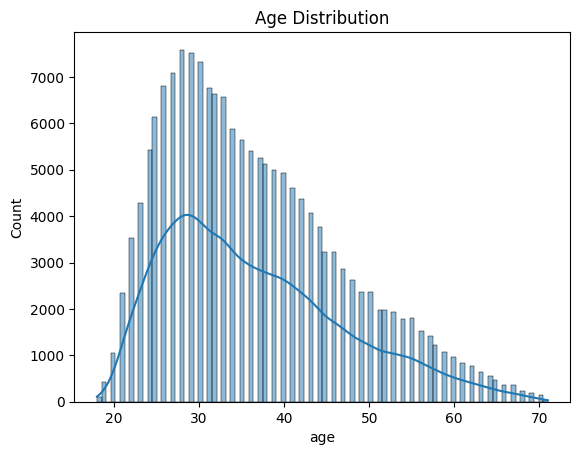

In [ ]:
#Распределение по возрасту
sns.histplot(credit['age'], kde=True)
plt.title('Age Distribution')
plt.show()

count    170546.000000
mean         36.499859
std          10.547074
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max          71.000000
Name: age, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='age'>

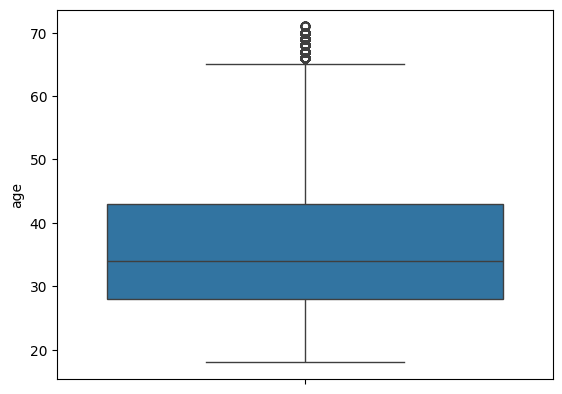

In [ ]:
columnsName = 'age'
print(credit[columnsName].describe())

fig2, ax2 = plt.subplots()
sns.boxplot(data=credit, y=columnsName)

Распределение клиентов по возрасту


На данных графиках мы видим, что наиболее склонны к пользованию кредитными средствами:
люди в возрасте от 28 до 43 лет. Пик приходится на возраст от 28 до 30 лет

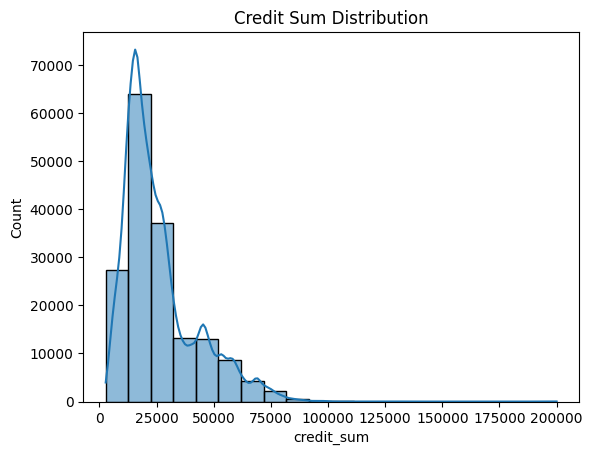

In [ ]:
#Распределение по суммам кредита
sns.histplot(credit['credit_sum'], kde=True, bins= 20)
plt.title('Credit Sum Distribution')
plt.show()

Сумма кредита в целом распределена равномерно, имеет смещение влево и достигает чуть больше 25000

count    170546.000000
mean      26093.677831
std       16233.354203
min        2736.000000
25%       14908.000000
50%       21229.000000
75%       32068.000000
max      200000.000000
Name: credit_sum, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='credit_sum'>

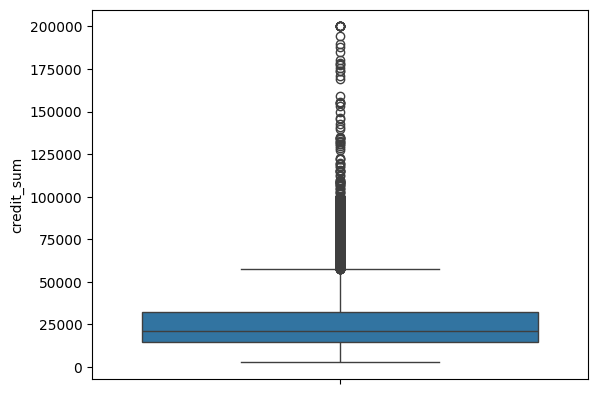

In [ ]:
columnsName = 'credit_sum'
print(credit[columnsName].describe())

fig2, ax2 = plt.subplots()
sns.boxplot(data=credit, y=columnsName)

In [ ]:
# РАСПРЕДЕЛЕНИЕ ЗАЕМЩИКОВ ПО РЕГИОНАМ

credit['living_region'].value_counts()

,count
living_region,
31,12843
30,9260
73,8734
23,8355
63,8302
...,...
45,54
81,32
78,31


<Axes: xlabel='living_region', ylabel='count'>

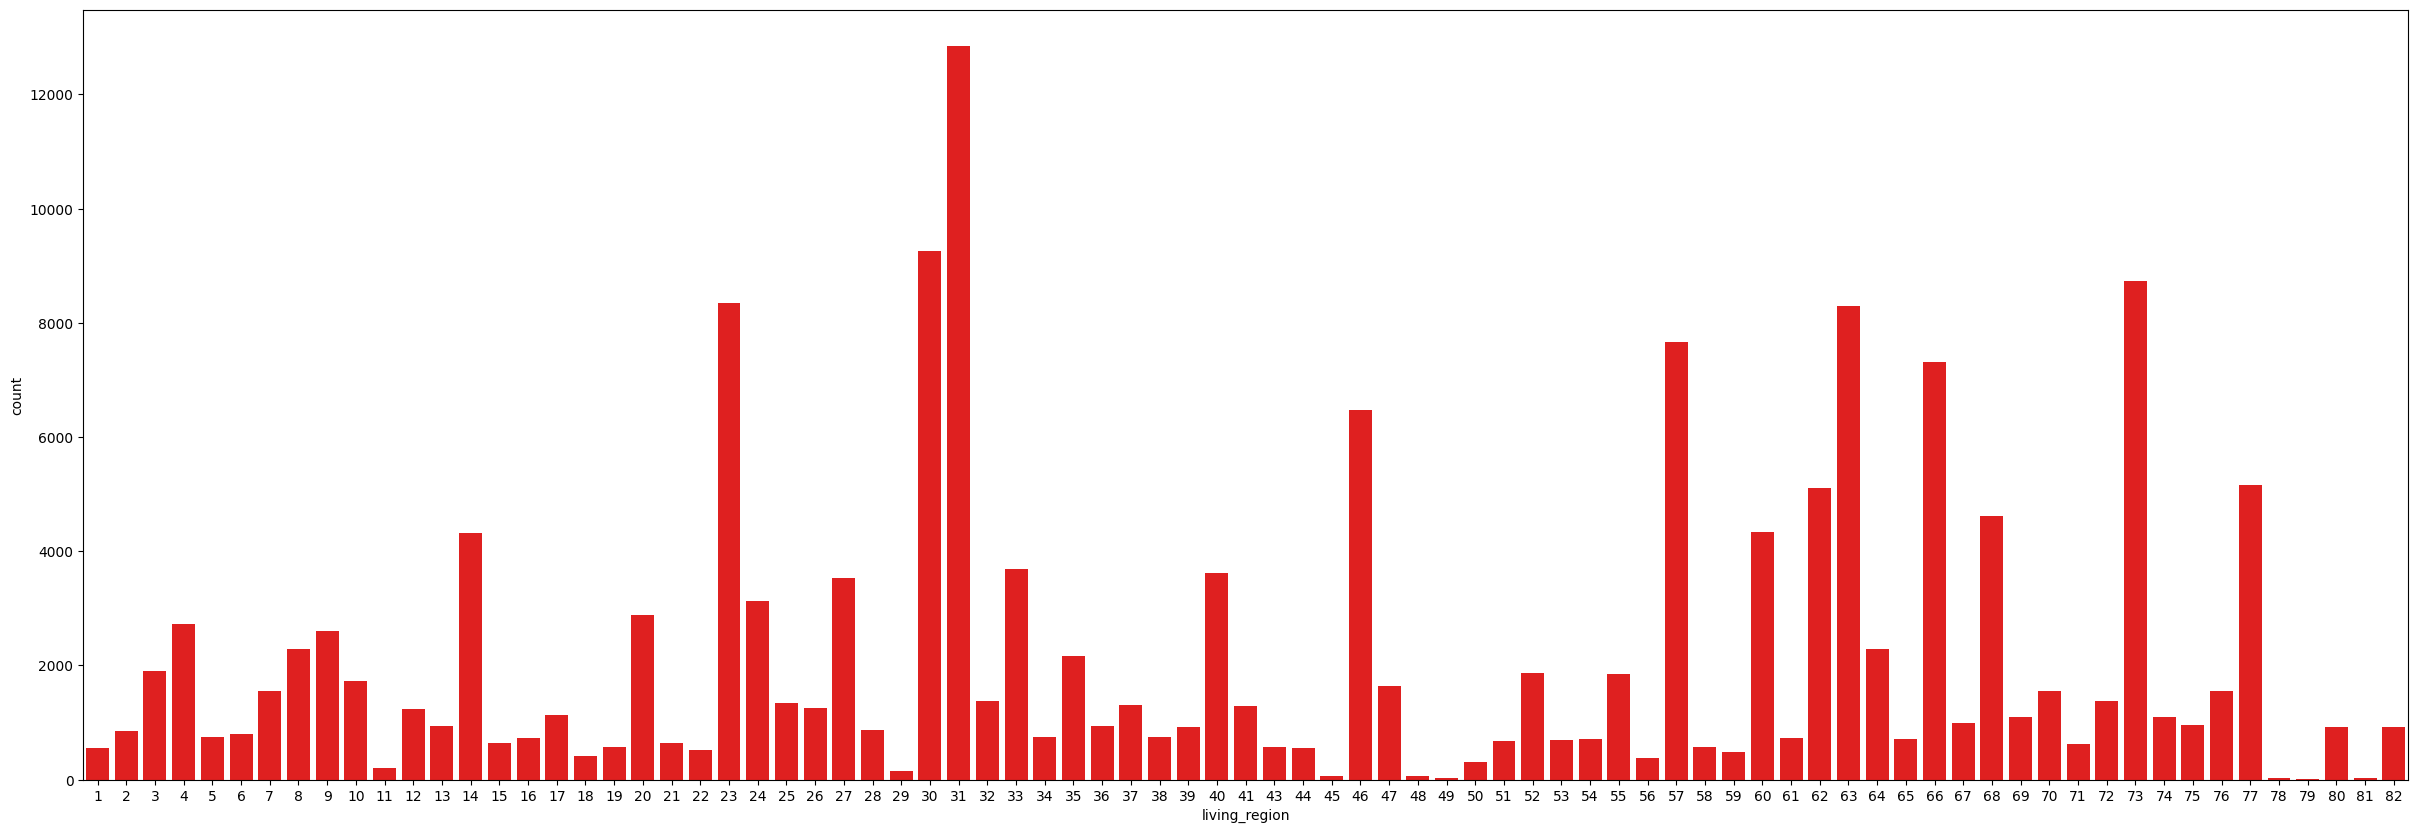

In [ ]:
# В абсолютных значениях
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(data = credit, x = 'living_region', color="red")

ВЫВОД:

Преимущественно кредиты оформляют в регионах с кодом 31, 73, 30, 23, 63

Рекордсменом по количеству заемщиков является регион 31



count    170546.000000
mean         43.010437
std          22.219600
min           1.000000
25%          25.000000
50%          40.000000
75%          63.000000
max          82.000000
Name: living_region, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='living_region'>

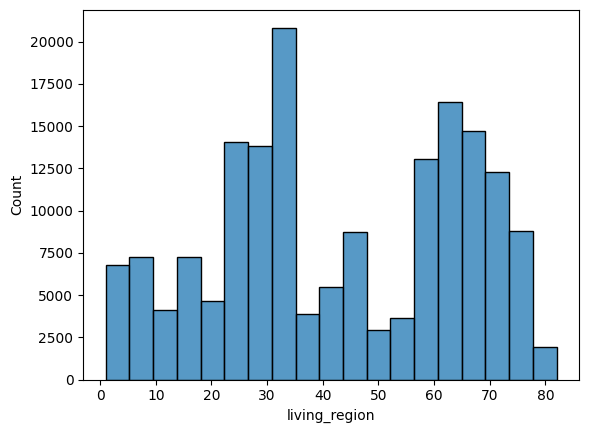

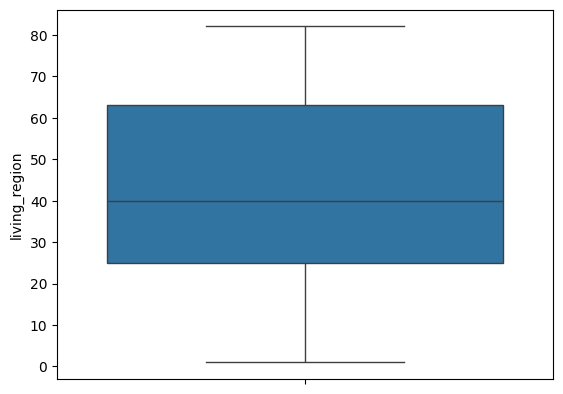

In [ ]:
columnsName = 'living_region'
print(credit[columnsName].describe())
fig, ax = plt.subplots()
sns.histplot(data=credit, x=columnsName, bins=19, ax=ax)
fig2, ax2 = plt.subplots()
sns.boxplot(data=credit, y=columnsName)

In [ ]:
# РАСПРЕДЕЛЕНИЕ ЗАЕМЩИКОВ ПО ЧИСЛУ ВЗЯТЫХ КРЕДИТОВ

credit['credit_count'].value_counts()

,count
credit_count,
2,45838
1,45558
0,25772
3,23891
4,14096
5,7537
6,3911
7,1961
8,1007


<Axes: xlabel='credit_count', ylabel='count'>

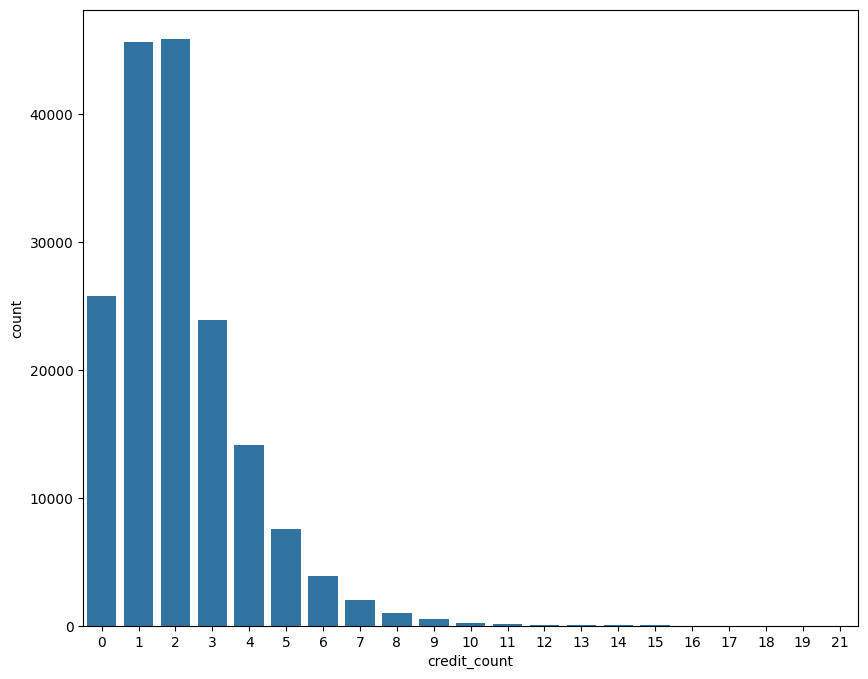

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data = credit, x = 'credit_count')

ВЫВОД:

 доля людей, не имеющих кредитов, примерно равна доле людей, имеющих 3 кредита

поведение людей рационально: людей, берущих только один кредит, большинство, с увеличением числа кредитов количество заемщиков уменьшатся

In [ ]:
# ДОЛЯ НЕ ИМЕЮЩИХ КРЕДИТЫ

print(round(100*len(credit.query('credit_count == 0'))/credit.shape[0],2),'%')

15.11 %


In [ ]:
# РАСПРЕДЕЛЕНИЕ ЗАЕМЩИКОВ ПО ЧИСЛУ ПРОСРОЧЕННЫХ КРЕДИТОВ
# 2-ое условие - для исключения из подсчета лиц, не имеющих кредитов

credit[(credit['overdue_credit_count'] > 0) & (credit['credit_count'] > 0)]['overdue_credit_count'].value_counts()

,count
overdue_credit_count,
1,7319
2,49
3,5


<Axes: xlabel='overdue_credit_count', ylabel='count'>

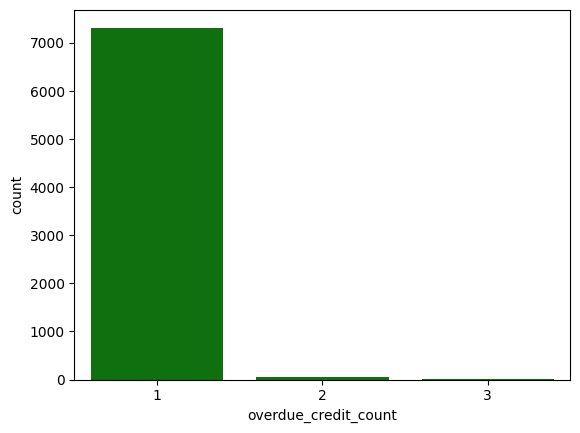

In [ ]:
plt.subplot(1,1,1)
sns.countplot(data = credit[(credit['overdue_credit_count'] > 0) & (credit['credit_count'] > 0)], x = 'overdue_credit_count', color = 'Green')

Здесь число заемщиков резко падает с ростом числа просроченных кредитов.

In [ ]:
# ДОЛЯ ЛИЦ, ИМЕЮЩИХ ПРОСРОЧЕННЫЕ КРЕДИТЫ, ОТ ОБЩЕГО ЧИСЛА ЗАЕМЩИКОВ

print(round(100*len(credit.query('overdue_credit_count > 0'))/len(credit.query('credit_count > 0')),2),'%')

5.09 %


In [ ]:
# ОЦЕНКА ЗАКРЕДИТОВАННОСТИ
#Число выданных кредитов в зависимости от пола
credit_count_gender = credit.groupby('gender')['credit_count'].sum()
print("Число выданных кредитов в зависимости от пола\n", credit_count_gender.sort_values())

Число выданных кредитов в зависимости от пола
 gender
2    169893
1    188220
Name: credit_count, dtype: int64


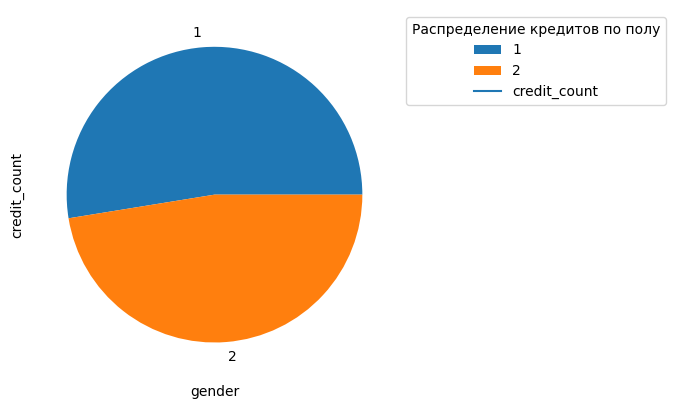

In [ ]:
#Число выданных кредитов в зависимости от пола
credit_count_gender.plot.pie()
credit_count_gender.plot().legend(title = 'Распределение кредитов по полу', bbox_to_anchor=(1, 1))

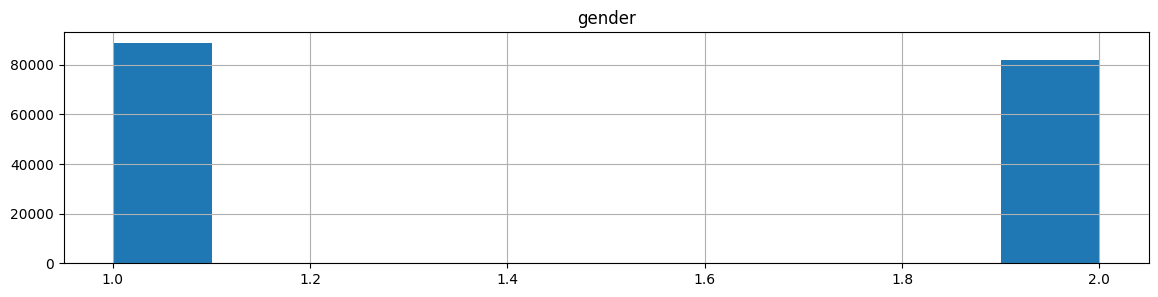

In [ ]:
credit.hist('gender', bins=10, figsize=(14,3));
# new table

Число выданных кредитов в зависимости от пола

Число выданных кредитов в зависимости от образования
 education
1       267
3      1434
5     19701
2    156862
4    179849
Name: credit_count, dtype: int64


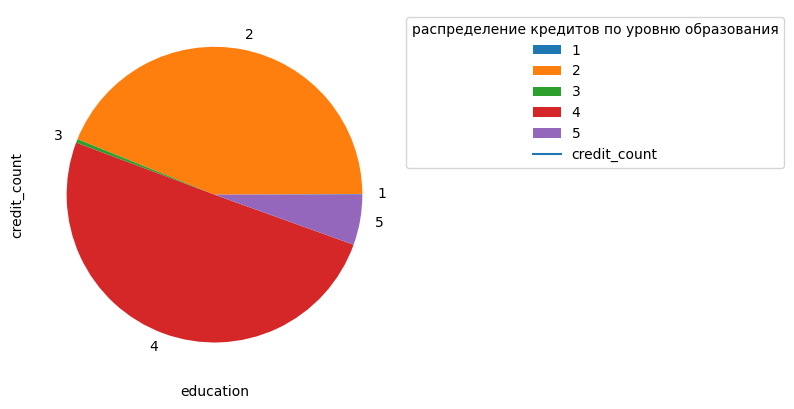

In [ ]:
#Число выданных кредитов в зависимости от образования
credit_count_education = credit.groupby('education')['credit_count'].sum()
print("Число выданных кредитов в зависимости от образования\n", credit_count_education.sort_values())

credit_count_education.plot.pie()
credit_count_education.plot().legend(title = 'распределение кредитов по уровню образования', bbox_to_anchor=(1, 1))

Число выданных кредитов в зависимости от возраста
 age
71       36
18      202
70      215
69      232
68      386
66      625
67      638
19      723
65      929
64     1216
63     1548
20     1638
62     1840
61     2002
60     2332
59     2602
58     2908
57     3458
21     3458
56     3643
54     4267
53     4361
55     4389
51     4576
52     4776
22     4942
49     5390
50     5466
48     6088
23     6126
47     6560
46     7400
45     7485
24     8189
44     8768
43     9281
42     9994
25    10184
41    10714
39    11205
40    11280
38    11759
37    11821
36    11978
26    12329
35    12625
34    13057
27    13581
33    14410
31    14412
32    14479
28    15058
29    15190
30    15342
Name: credit_count, dtype: int64


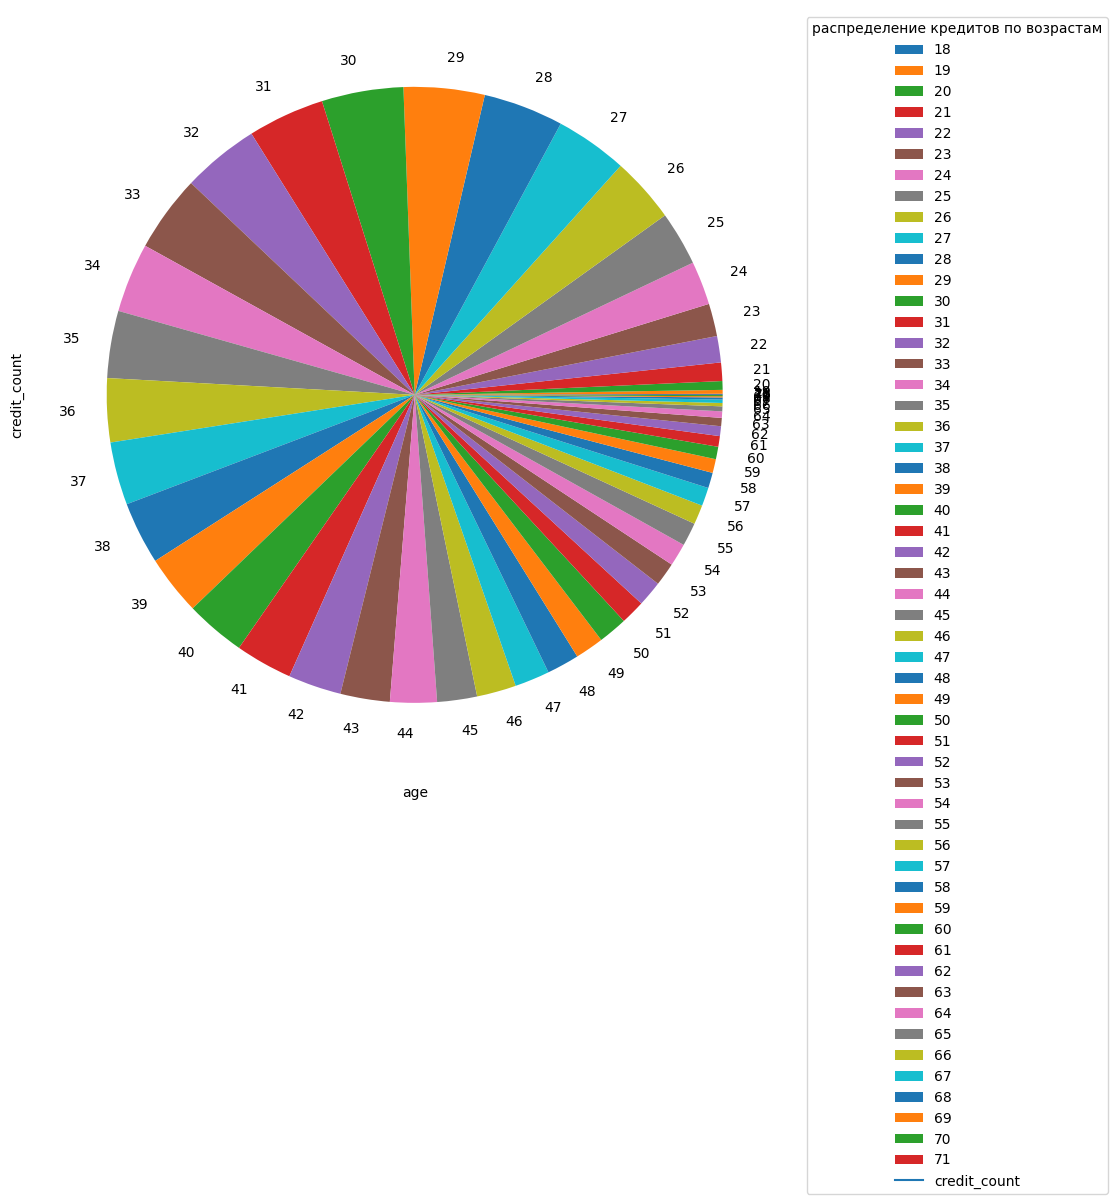

In [ ]:
credit_count_age = credit.groupby('age')['credit_count'].sum()
print("Число выданных кредитов в зависимости от возраста\n", credit_count_age.sort_values())

plt.figure(figsize = (12, 10))

credit_count_age.plot.pie()
credit_count_age.plot().legend(title = 'распределение кредитов по возрастам', bbox_to_anchor=(1, 1))



In [ ]:
#sns.barplot(data = credit, x = 'age', y = 'credit_count', estimator='size')
#plt.gcf().set_size_inches(15,8)

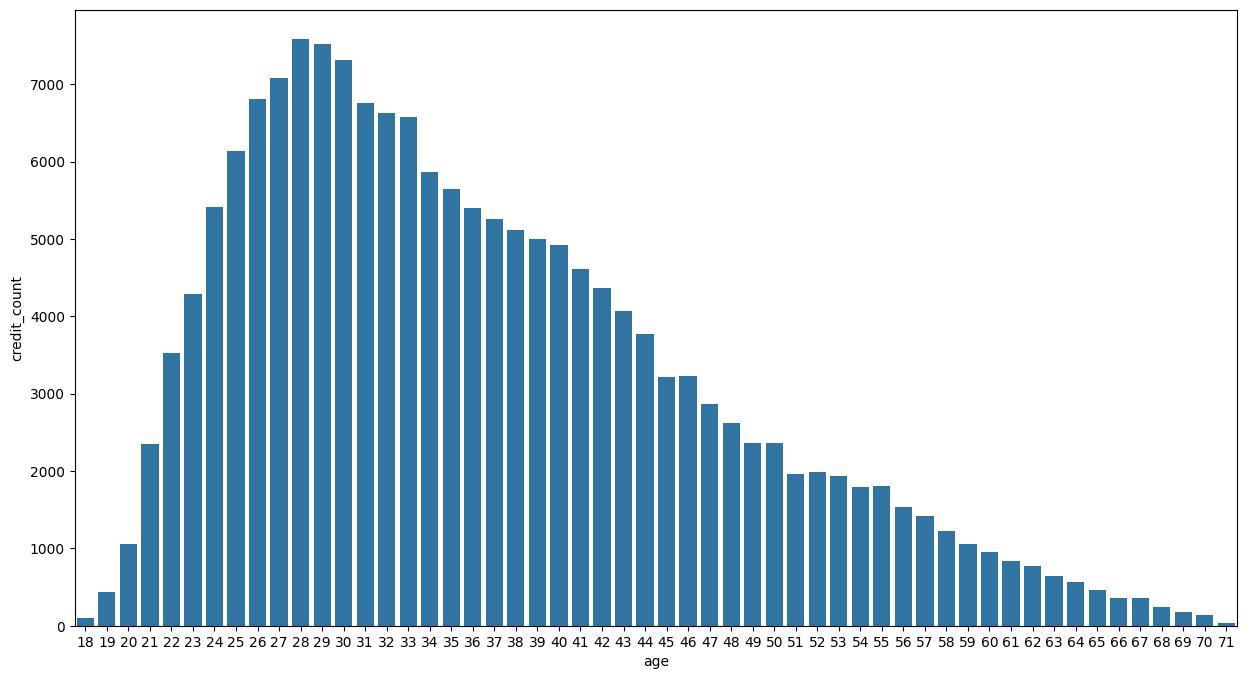

In [ ]:
# представим разбиение по возрастам на линейной шкале

sns.barplot(data = credit, x = 'age', y = 'credit_count', estimator='size')
plt.gcf().set_size_inches(15,8)

Число выданных кредитов в зависимости от семейного положения
 marital_status
5      8292
1      9178
2     38126
4     97162
3    205355
Name: credit_count, dtype: int64

относительные доли взятых кредитов по семейному положению (в %):
marital_status
1     2.56
2    10.65
3    57.34
4    27.13
5     2.32
dtype: float64


<ipython-input-44-345a7aa79c12>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  credit_by_marital_relative = round(100 * credit.groupby('marital_status').apply (lambda x: x['credit_count'].sum()/credit['credit_count'].sum()), 2)


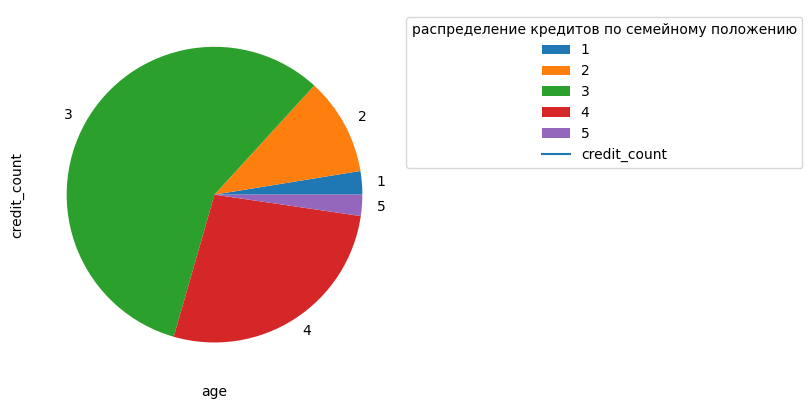

In [ ]:
#Число выданных кредитов в зависимости от семейного положения
credit_count_marital_status = credit.groupby('marital_status')['credit_count'].sum()
print("Число выданных кредитов в зависимости от семейного положения\n", credit_count_marital_status.sort_values())

credit_count_marital_status.plot.pie()
credit_count_age.plot().legend(title = 'распределение кредитов по семейному положению', bbox_to_anchor=(1, 1))

credit_by_marital_relative = round(100 * credit.groupby('marital_status').apply (lambda x: x['credit_count'].sum()/credit['credit_count'].sum()), 2)
print(f'\nотносительные доли взятых кредитов по семейному положению (в %):\n{credit_by_marital_relative}')

<Axes: >

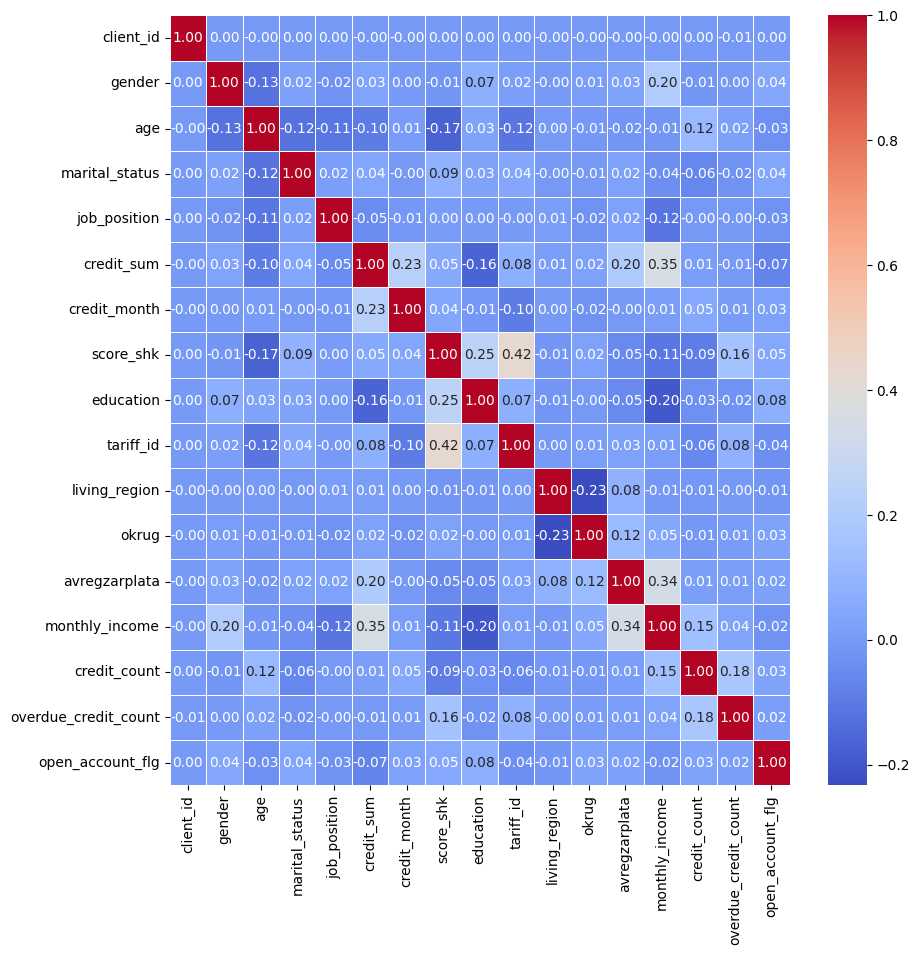

In [ ]:
# Тепловая карта корреляционной матрицы

correlation_matrix = credit.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)


In [ ]:
# МАТРИЦА КОРРЕЛЯЦИИ (ОЦЕНКА ВЕЛИЧИНЫ ЛИНЕЙНОЙ СВЯЗИ МЕЖДУ ПАРАМЕТРАМИ)

credit_corr = credit.corr().round(2)
credit_corr

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
client_id,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.01,0.00
gender,0.00,1.00,-0.13,0.02,-0.02,0.03,0.00,-0.01,0.07,0.02,-0.00,0.01,0.03,0.20,-0.01,0.00,0.04
age,-0.00,-0.13,1.00,-0.12,-0.11,-0.10,0.01,-0.17,0.03,-0.12,0.00,-0.01,-0.02,-0.01,0.12,0.02,-0.03
marital_status,0.00,0.02,-0.12,1.00,0.02,0.04,-0.00,0.09,0.03,0.04,-0.00,-0.01,0.02,-0.04,-0.06,-0.02,0.04
job_position,0.00,-0.02,-0.11,0.02,1.00,-0.05,-0.01,0.00,0.00,-0.00,0.01,-0.02,0.02,-0.12,-0.00,-0.00,-0.03
credit_sum,-0.00,0.03,-0.10,0.04,-0.05,1.00,0.23,0.05,-0.16,0.08,0.01,0.02,0.20,0.35,0.01,-0.01,-0.07
credit_month,-0.00,0.00,0.01,-0.00,-0.01,0.23,1.00,0.04,-0.01,-0.10,0.00,-0.02,-0.00,0.01,0.05,0.01,0.03
score_shk,0.00,-0.01,-0.17,0.09,0.00,0.05,0.04,1.00,0.25,0.42,-0.01,0.02,-0.05,-0.11,-0.09,0.16,0.05
education,0.00,0.07,0.03,0.03,0.00,-0.16,-0.01,0.25,1.00,0.07,-0.01,-0.00,-0.05,-0.20,-0.03,-0.02,0.08
tariff_id,0.00,0.02,-0.12,0.04,-0.00,0.08,-0.10,0.42,0.07,1.00,0.00,0.01,0.03,0.01,-0.06,0.08,-0.04


Самая сильная прямо пропорциональная связь существует

между ежемесячным доходом и суммой взятых кредитов,


между ежемесячным доходом и средней зарплатой по региону


между скоринговой оценкой и тарифом


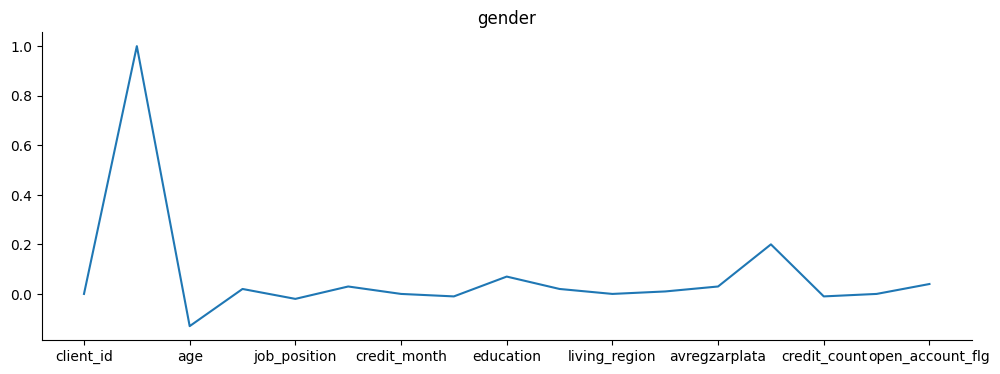

In [ ]:
credit_corr['gender'].plot(kind='line', figsize=(12, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

0.14514668795360944

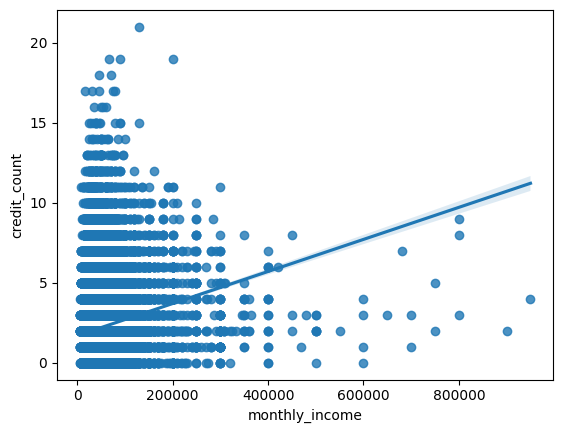

In [ ]:
# ПРИМЕР ОТНОШЕНИЯ МЕЖДУ ЕЖЕМЕСЯЧНЫМ ДОХОДОМ И ЧИСЛОМ ВЗЯТЫХ КРЕДИТОВ
sns.regplot(data = credit, x ='monthly_income', y='credit_count')
credit['credit_count'].corr(credit['monthly_income'])

Корреляция между ежемесячным доходом и количеством выданных кредитов. Чем выше доход, тем меньше кредитов оформляют люди.

<Axes: xlabel='monthly_income', ylabel='credit_sum'>

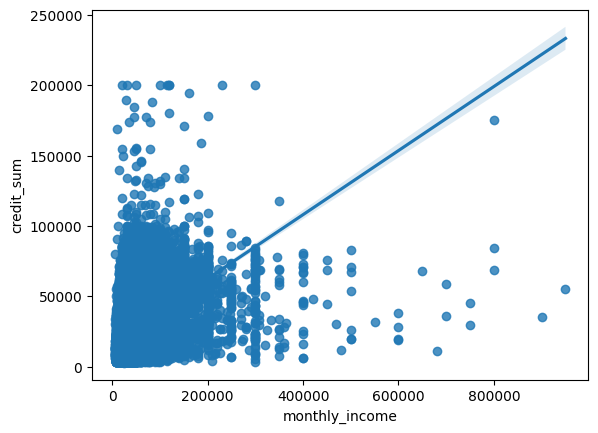

In [ ]:
sns.regplot(data = credit, x ='monthly_income', y='credit_sum')

Отношение ежемесячного дохода к сумме взятых кредитов.


 Преимущественно кредиты берут люди с заработной платной менее 200 000 руб., при этом в большинстве случаев это не большие суммы, в основном до 100 000 руб. При увеличении заработной платы резко уменьшается число заемщиков.

<Axes: xlabel='monthly_income', ylabel='overdue_credit_count'>

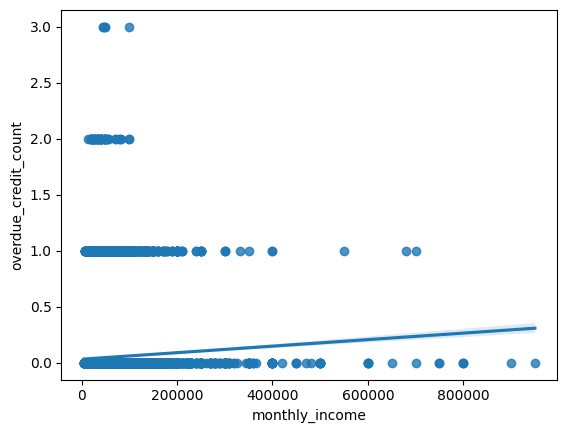

In [ ]:
sns.regplot(data = credit, x ='monthly_income', y='overdue_credit_count')

**Выводы:**

1. Существует незначительная взаимосвязь между этими графиками.


2. Кредиты берут люди с разным уровнем достатка, однако чаще всего их берут люди с невысоким уровнем дохода, предпочитая небольшие суммы.


3. График показывает, что наибольшее количество просроченных кредитов приходится на сегмент с низкими доходами.

In [ ]:
# ПОДТВЕРДИМ ПРЕДЫДУЩИЙ ВЫВОД, ВЫЧИСЛИВ КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ

print(credit['credit_sum'].corr(credit['monthly_income']))
print(credit['monthly_income'].corr(credit['credit_sum']))

0.3513728194079966
0.3513728194079966


<ipython-input-52-4015ab45e9dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit['credit_sum'])


<Axes: xlabel='credit_sum', ylabel='Density'>

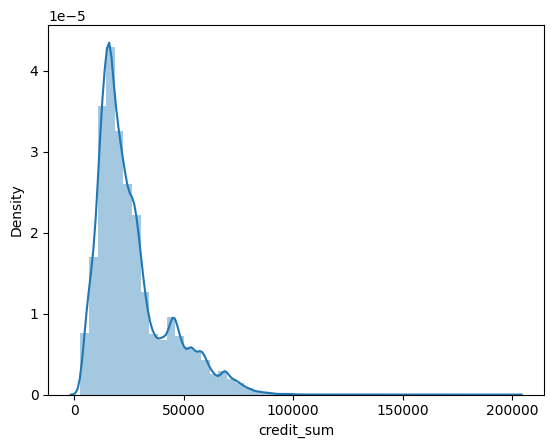

In [ ]:
# оценка нормального распределения (гистограмма) для суммы накопленных кредитов

sns.distplot(credit['credit_sum'])


Не имеет ничего общего с нормальным распределением.
Ниже мы сравним его с доверительным интервалом для среднего.

<ipython-input-53-850ef6a76077>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit['score_shk'])


<Axes: xlabel='score_shk', ylabel='Density'>

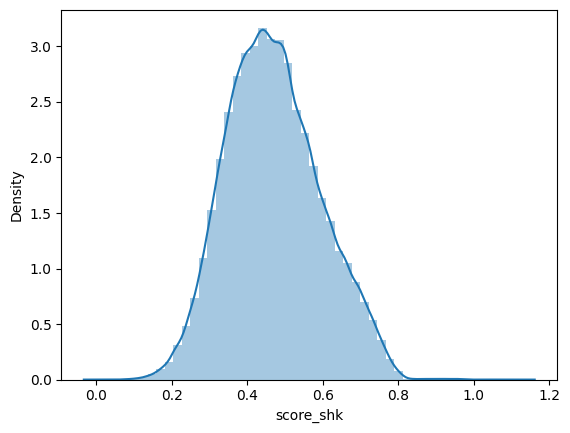

In [ ]:
# оценка нормального распределения (гистограмма) для скоринговой оценки

sns.distplot(credit['score_shk'])


 Распределение близко к нормальному.

In [ ]:
score_highest = credit.sort_values(by='score_shk', ascending = False)[:200]

In [ ]:
score_lowest = credit.query('score_shk != 0').sort_values(by='score_shk')[:200]

In [ ]:
statistic, p_value = st.ttest_ind(score_lowest['overdue_credit_count'], score_highest['overdue_credit_count'], nan_policy='omit')
print(statistic, p_value)
if p_value>0.05:
    print('принимаем нулевую гипотезу с вероятностью', p_value)
else:
    print('отклоняем нулевую гипотезу, т.к. вероятность - ', p_value)

-4.209860411449796 3.1618267867882024e-05
отклоняем нулевую гипотезу, т.к. вероятность -  3.1618267867882024e-05


Таким образом, мы можем сделать вывод о том, что существуют статистически значимые различия между количеством просроченных кредитов в выборках клиентов с высокой и низкой скоринговой оценкой.

In [ ]:
credit['open_account_flg'].value_counts()

,count
open_account_flg,
0,140491
1,30055


<Axes: xlabel='open_account_flg', ylabel='Count'>

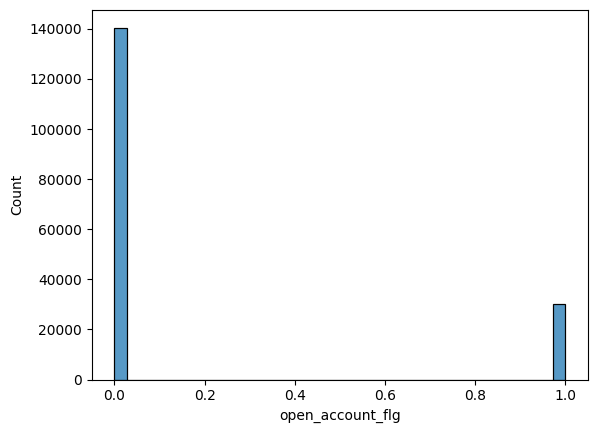

In [ ]:
sns.histplot(data=credit, x='open_account_flg', bins=37)

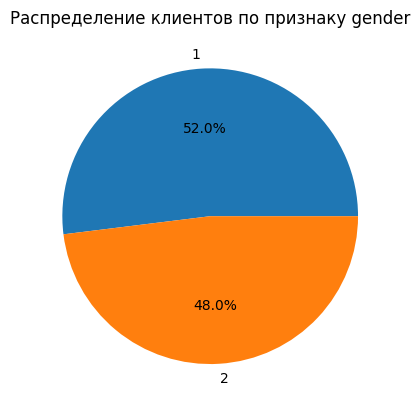

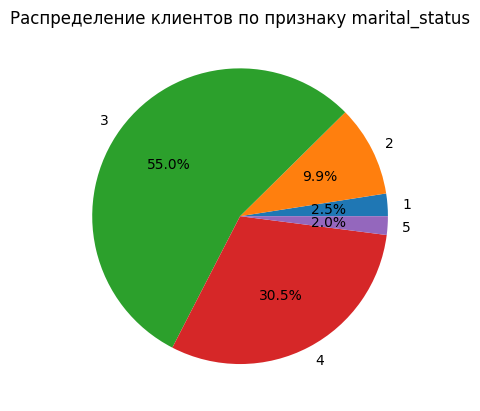

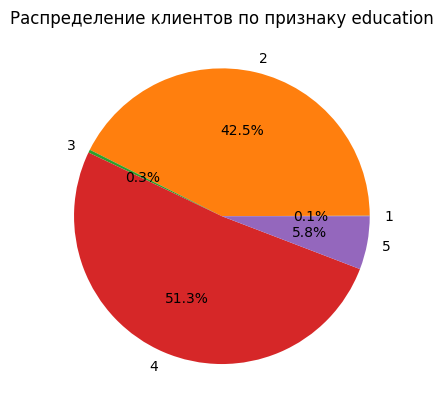

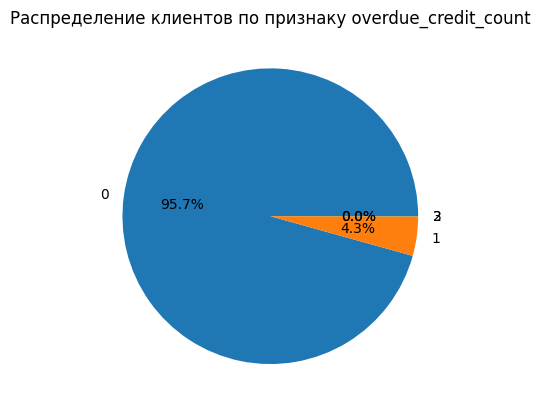

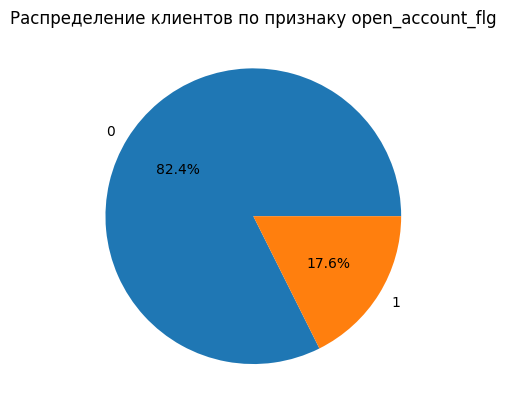

In [ ]:
for column in ['gender','marital_status', 'education', 'overdue_credit_count', 'open_account_flg']:
    data = credit.groupby(column).agg({'client_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(data['client_id'], labels=data.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


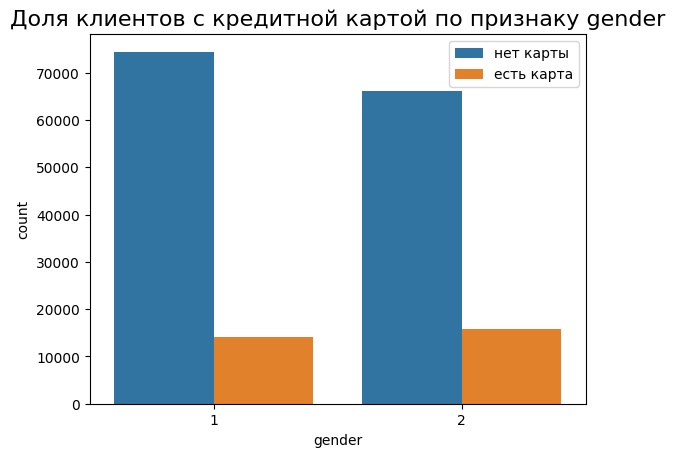

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


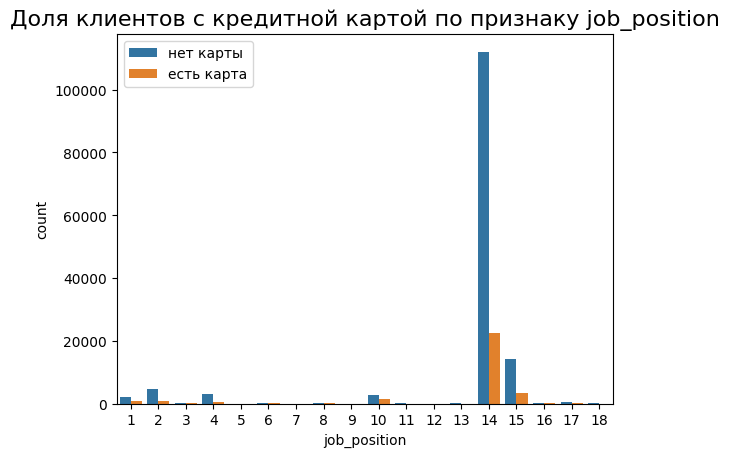

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


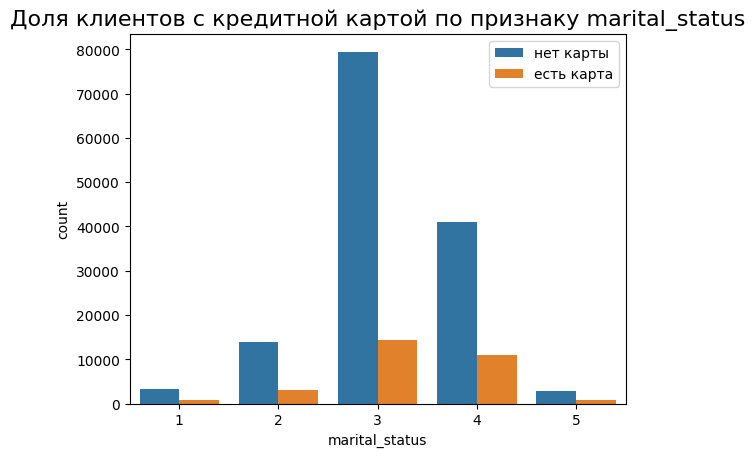

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


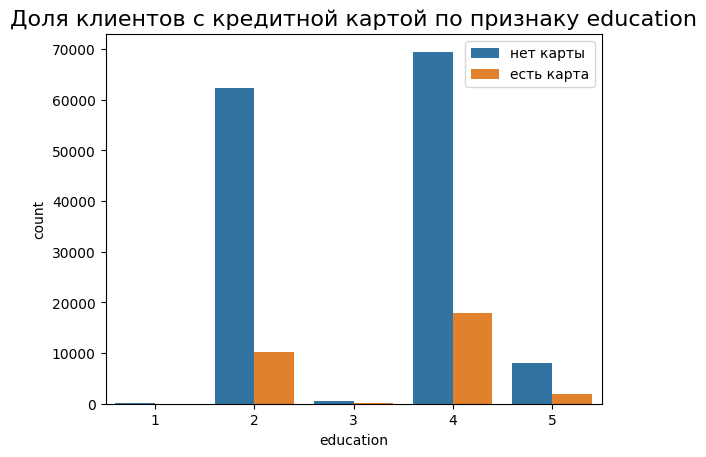

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


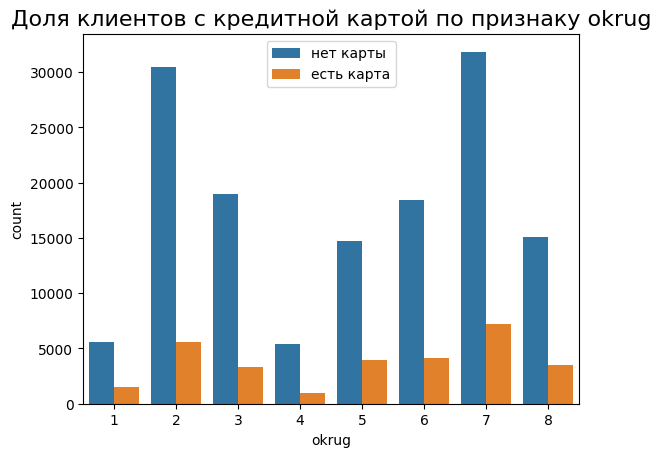

In [ ]:
for column in ['gender','job_position', 'marital_status', 'education', 'okrug']:
        ax = sns.countplot(data=credit, x=column, hue='open_account_flg');
        plt.title(f'Доля клиентов с кредитной картой по признаку {column}', fontsize = 16, color = 'black')
        plt.legend(['нет карты', 'есть карта'])
        plt.show()


> **ВЫВОД**

Кредиты берут люди с разным уровнем достатка. Однако, как показывают представленные данные, люди с невысокими доходами предпочитают брать небольшие суммы.

Наибольшее количество просроченных кредитов наблюдается в регионах с низкими зарплатами. Интересно, что в регионах со средней зарплатой просрочка по кредитам немного выше, чем в регионах с низкими доходами. Преимущественно кредиты берут люди с заработной платной менее 200 000 руб., при этом в большинстве случаев это не большие суммы, в основном до 100 000 руб. При увеличении заработной платы резко уменьшается число заемщиков.

Доля людей, не имеющих кредитов, примерно равна доле людей, имеющих 3 кредита, поведение людей рационально: людей, берущих только один кредит, большинство, с увеличением числа кредитов количество заемщиков уменьшатся.

наиболее склонны к пользованию кредитными средствами:
- люди в возрасте от 28 до 43 лет
- пик приходится на возраст 28 до 30
- с уровнем образования 2 и 4
- в регионах с кодом 31, 73, 30, 23, 63
- больше всего кредитов берут заемщики с семейным статусом 3, меньше всего - со статусом 5 и 1, причем разница составляет почти 2500%

Вероятность просрочки выше у клиентов с высокой скоринговой оценкой.

In [ ]:
credit.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [ ]:
credit

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,2,48,3,15,59998.00,10,0.770249,2,28,23,8,25850.0,30000.0,1,1,0
1,3,2,32,3,14,10728.00,12,0.459589,4,2,64,2,23430.0,23000.0,5,0,0
2,4,1,27,2,14,12009.09,12,0.362536,2,2,8,8,23650.0,17000.0,2,0,0
3,5,2,45,3,14,16908.89,10,0.421385,4,2,77,6,26620.0,35000.0,1,0,0
4,6,1,37,3,14,26788.00,10,0.484203,4,2,68,4,22000.0,30000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170541,170742,1,27,4,14,64867.00,12,0.535257,2,2,57,2,27060.0,40000.0,6,0,0
170542,170743,1,24,3,14,17640.00,6,0.573287,4,28,63,3,45430.0,30000.0,1,0,0
170543,170744,1,31,4,14,27556.47,10,0.416098,2,19,41,1,33990.0,40000.0,1,0,0
170544,170745,1,53,2,10,6189.00,12,0.482595,4,2,39,2,22990.0,31000.0,2,0,0


from matplotlib import pyplot as plt
credit['client_id'].plot(kind='hist', bins=20, title='client_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit['marital_status'].plot(kind='hist', bins=20, title='marital_status')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit.plot(kind='scatter', x='client_id', y='gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit.plot(kind='scatter', x='gender', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit.plot(kind='scatter', x='age', y='marital_status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
credit.plot(kind='scatter', x='marital_status', y='job_position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['client_id']
  ys = series['gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit.sort_values('client_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('client_id')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['client_id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit.sort_values('client_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('client_id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['client_id']
  ys = series['marital_status']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit.sort_values('client_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('client_id')
_ = plt.ylabel('marital_status')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['client_id']
  ys = series['job_position']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = credit.sort_values('client_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('client_id')
_ = plt.ylabel('job_position')

from matplotlib import pyplot as plt
credit['client_id'].plot(kind='line', figsize=(8, 4), title='client_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
credit['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
credit['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
credit['marital_status'].plot(kind='line', figsize=(8, 4), title='marital_status')
plt.gca().spines[['top', 'right']].set_visible(False)

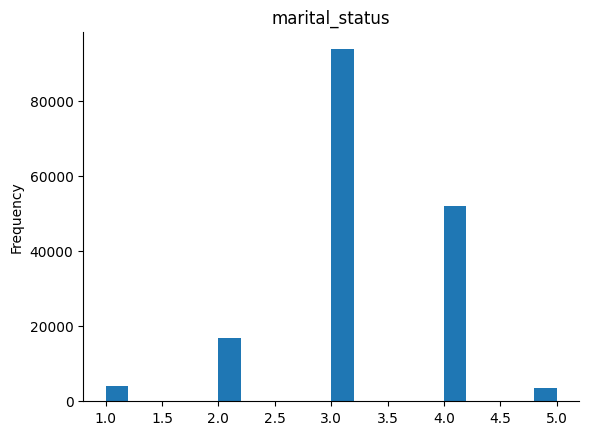

In [ ]:
from matplotlib import pyplot as plt
credit['marital_status'].plot(kind='hist', bins=20, title='marital_status')
plt.gca().spines[['top', 'right',]].set_visible(False)

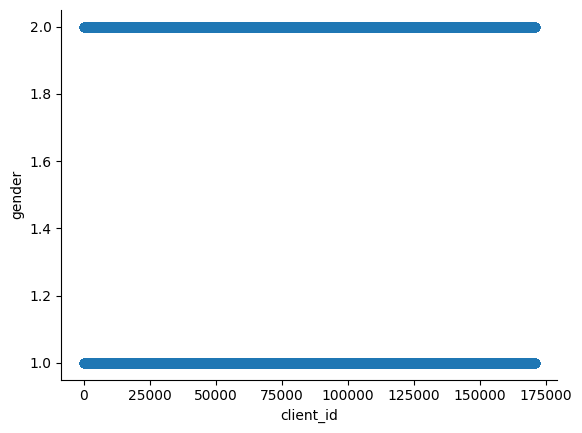

In [ ]:
from matplotlib import pyplot as plt
credit.plot(kind='scatter', x='client_id', y='gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from math import sqrt as square_root

In [ ]:
from math import sqrt

In [ ]:
from math import*

In [ ]:
import math

In [ ]:
import math as mt

In [ ]:
import math, pandas as pd